In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "ToyotaCorolla.csv"

df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,"tolgahancepel/toyota-corolla",file_path,)

print("First 5 records:", df.head())

/tmp/ipython-input-1758416092.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'toyota-corolla' dataset.
First 5 records:    Price  Age     KM FuelType  HP  MetColor  Automatic    CC  Doors  Weight
0  13500   23  46986   Diesel  90         1          0  2000      3    1165
1  13750   23  72937   Diesel  90         1          0  2000      3    1165
2  13950   24  41711   Diesel  90         1          0  2000      3    1165
3  14950   26  48000   Diesel  90         0          0  2000      3    1165
4  13750   30  38500   Diesel  90         0          0  2000      3    1170


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [ ]:
df.info(), df.describe(include='all'), df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


(None,
                Price          Age             KM FuelType           HP  \
 count    1436.000000  1436.000000    1436.000000     1436  1436.000000   
 unique           NaN          NaN            NaN        3          NaN   
 top              NaN          NaN            NaN   Petrol          NaN   
 freq             NaN          NaN            NaN     1264          NaN   
 mean    10730.824513    55.947075   68533.259749      NaN   101.502089   
 std      3626.964585    18.599988   37506.448872      NaN    14.981080   
 min      4350.000000     1.000000       1.000000      NaN    69.000000   
 25%      8450.000000    44.000000   43000.000000      NaN    90.000000   
 50%      9900.000000    61.000000   63389.500000      NaN   110.000000   
 75%     11950.000000    70.000000   87020.750000      NaN   110.000000   
 max     32500.000000    80.000000  243000.000000      NaN   192.000000   
 
            MetColor    Automatic           CC        Doors      Weight  
 count   1436.000

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
Price,0
Age,0
KM,0
FuelType,0
HP,0
MetColor,0
Automatic,0
CC,0
Doors,0
Weight,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1431,False
1432,False
1433,False
1434,False


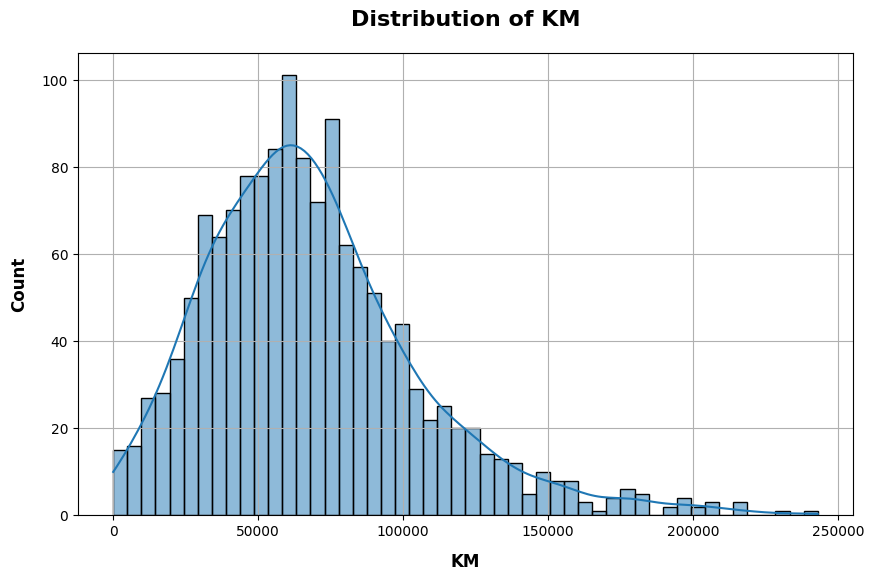

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['KM'], bins=50, kde=True)
plt.title('Distribution of KM', fontweight='bold', pad=20, fontsize=16)
plt.xlabel('KM', fontweight='bold', labelpad=10, fontsize=12)
plt.ylabel('Count', fontweight='bold', labelpad=10, fontsize=12)
plt.grid(True)
plt.show()

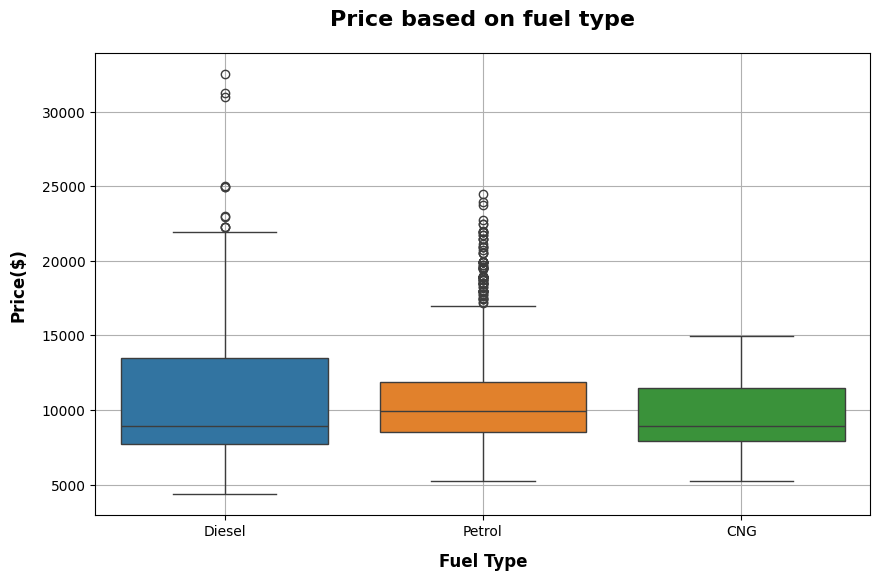

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='FuelType', y='Price', hue='FuelType')
plt.title('Price based on fuel type', fontweight='bold', pad=20, fontsize=16)
plt.xlabel('Fuel Type', labelpad=10, fontweight='bold', fontsize=12)
plt.ylabel('Price($)', labelpad=10, fontweight='bold', fontsize=12)
plt.grid(True)
plt.show()

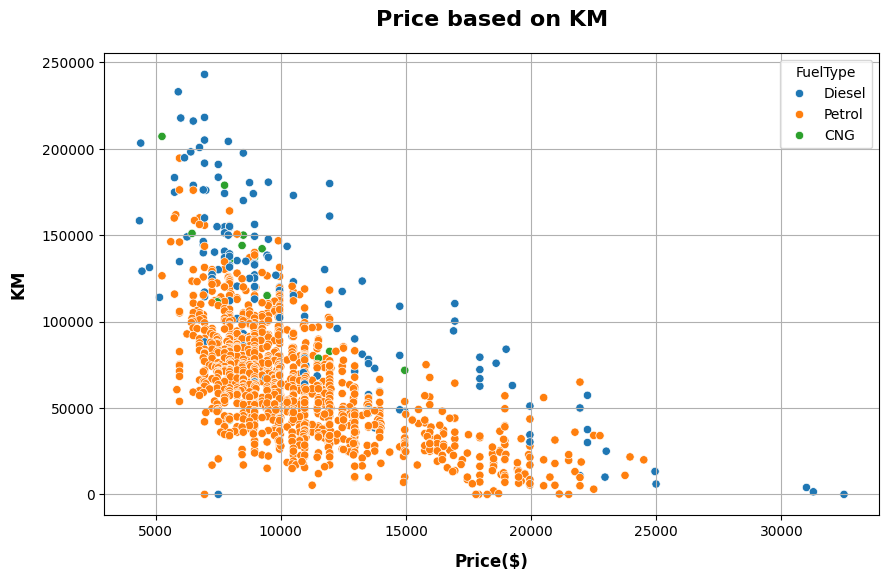

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price', y='KM', hue='FuelType')
plt.title('Price based on KM', fontweight='bold', pad=20, fontsize=16)
plt.xlabel('Price($)', labelpad=10, fontweight='bold', fontsize=12)
plt.ylabel('KM', labelpad=10, fontweight='bold', fontsize=12)
plt.grid(True)
plt.show()

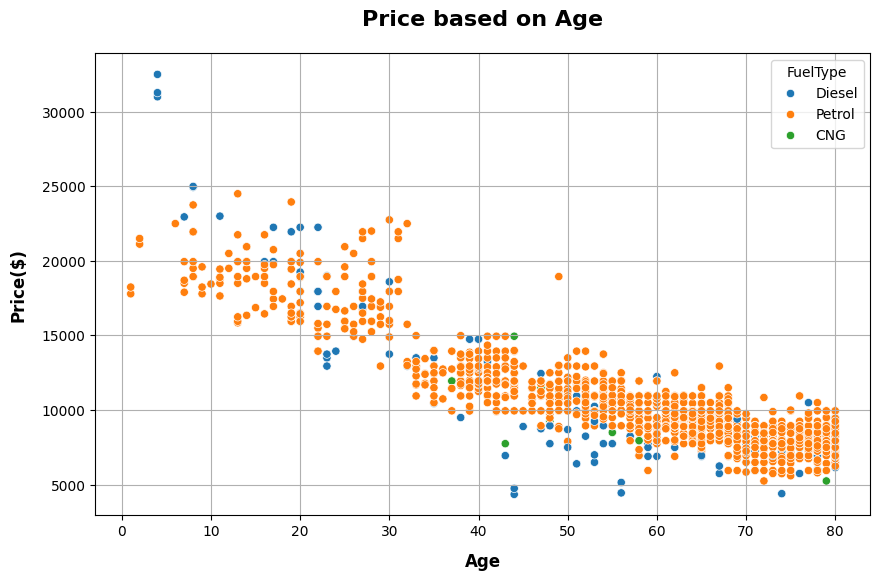

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Price', hue='FuelType')
plt.title('Price based on Age', fontweight='bold', pad=20, fontsize=16)
plt.xlabel('Age', labelpad=10, fontweight='bold', fontsize=12)
plt.ylabel('Price($)', labelpad=10, fontweight='bold', fontsize=12)
plt.grid(True)
plt.show()

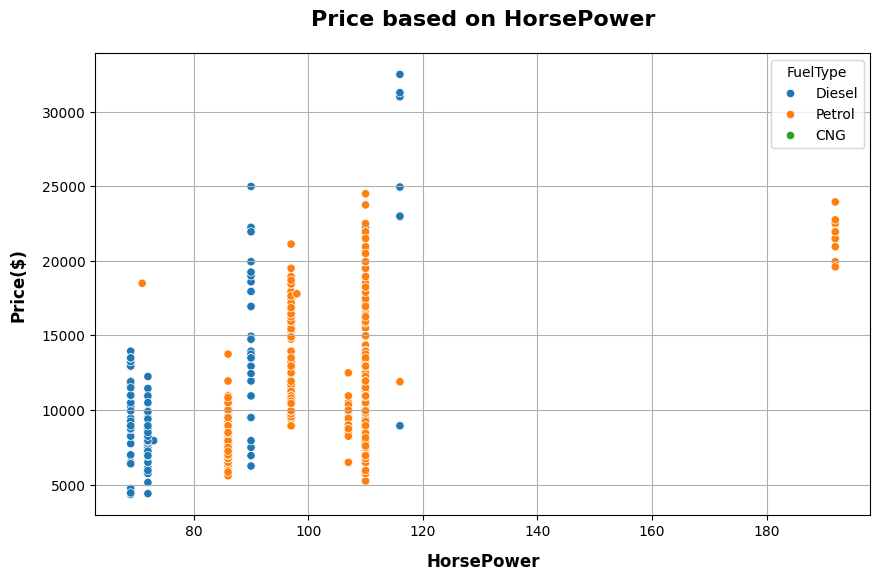

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='HP', y='Price', hue='FuelType')
plt.title('Price based on HorsePower', fontweight='bold', pad=20, fontsize=16)
plt.xlabel('HorsePower', labelpad=10, fontweight='bold', fontsize=12)
plt.ylabel('Price($)', labelpad=10, fontweight='bold', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


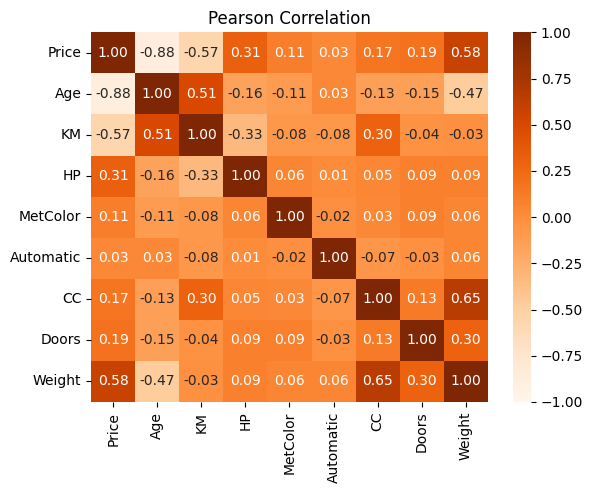

In [ ]:
num_cols = ['Price','Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight']
Corr = df[num_cols].corr(method='pearson')
sns.heatmap(Corr, annot=True, fmt='.2f', cmap='Oranges', vmin=-1, vmax=1)
plt.title('Pearson Correlation')
plt.show()

In [ ]:
X = df[['Age', 'KM', 'Weight']]
y = df[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

lr = LinearRegression()

lr.fit(X_train_s, y_train)

y_pred = lr.predict(X_test_s)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'Std: {np.std(y_test)}')
print(f'R2: {r2:.2f}')

RMSE: 1494.98
Std: Price    3652.778236
dtype: float64
R2: 0.83


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:

degrees = [1,2,3,4]

results=[]

for deg in degrees:
  poly = PolynomialFeatures(degree = deg, include_bias=False)
  X_train_poly = poly.fit_transform(X_train_s)
  X_test_poly = poly.transform(X_test_s)

  lr_poly = LinearRegression()
  lr_poly.fit(X_train_poly, y_train)

  y_pred_poly = lr_poly.predict(X_test_poly)

  rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
  r2_poly = r2_score(y_test, y_pred_poly)

  results.append((deg, rmse_poly, r2_poly))

  print(f'Degree {deg}: RMSE {rmse_poly:.2f}, R2: {r2_poly:.2f}')

Poly_results = pd.DataFrame(results, columns=['Degree', 'RMSE', 'R2 Score'])
Poly_results.head()

Degree 1: RMSE 1494.98, R2: 0.83
Degree 2: RMSE 1163.86, R2: 0.90
Degree 3: RMSE 1958.80, R2: 0.71
Degree 4: RMSE 12250.74, R2: -10.25


,Degree,RMSE,R2 Score
0,1,1494.975940,0.832497
1,2,1163.859191,0.898479
2,3,1958.800013,0.712437
3,4,12250.739549,-10.248070


In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_s, y_train)

y_pred_r = ridge.predict(X_test_s)

print("Ridge R2:", r2_score(y_test, y_pred_r))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_r)))

Ridge R2: 0.8324846255333345
Ridge RMSE: 1495.0325312789519


In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_s, y_train)

y_pred_l = lasso.predict(X_test_s)

print("Lasso R2:", r2_score(y_test, y_pred_l))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_l)))

Lasso R2: 0.8324973764274688
Lasso RMSE: 1494.975630936621


In [ ]:
rf = RandomForestRegressor(n_estimators=300, max_depth=None, random_state=42)

rf.fit(X_train, np.ravel(y_train))

y_pred_rf = rf.predict(X_test)

print("RF R2:", r2_score(y_test, y_pred_rf))
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

RF R2: 0.9063358084013464
RF RMSE: 1117.9183917964942


In [ ]:
grad_b = GradientBoostingRegressor(random_state=42)

grad_b.fit(X_train, np.ravel(y_train))

y_pred_gb = grad_b.predict(X_test)

print("GB R2:", r2_score(y_test, y_pred_gb))
print("GB RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))

GB R2: 0.921592424101444
GB RMSE: 1022.827321184252


In [ ]:
xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, subsample=0.9, colsample_bytree=0.9, random_state=42)

xgb.fit(X_train, np.ravel(y_train))

y_pred_xgb = xgb.predict(X_test)

print('XGB RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print('XGB R2: ', r2_score(y_test, y_pred_xgb))

XGB RMSE:  1041.6128719442747
XGB R2:  0.9186858534812927


Baseline Linear Regression: R2 = 0.83

Best Model (Gradient Boosting): R2 = 0.922

XGBoost close second: R2 = 0.918

Ensemble models outperform linear models on non-linear automotive price data.

Polynomial Regression degree 2 also performs strongly (R2 = 0.90), confirming non-linear relationships between features and price.